# Unidad 3: Caso práctico

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


En el archivo “mammals.csv” se encuentra una lista de mamíferos y los constituyentes de su leche. A partir de esta información segmentar los mamíferos en base los constituyentes de la leche.

Para resolver el problema en primer lugar se ha de cargar el archivo con pandas.

In [2]:
import pandas as pd

mammals = pd.read_csv('mammals.csv', sep = ',')
mammals.head()

,name,water,protein,fat,lactose,ash
0,Horse,90.1,2.6,1.0,6.9,0.35
1,Orangutan,88.5,1.4,3.5,6.0,0.24
2,Monkey,88.4,2.2,2.7,6.4,0.18
3,Donkey,90.3,1.7,1.4,6.2,0.40
4,Hippo,90.4,0.6,4.5,4.4,0.10


Ahora se ha de eliminar las variables que son se van a utilizar para la segmentación, en esta ocasión el nombre del animal.  Por lo que se crear una nueva variable ` mammals_data` para usar posteriormente.

In [3]:
col_names = list(mammals.columns)
col_names.remove('name')

mammals_data = mammals[col_names]

Para seleccionar el número de clústeres en los que se divide los mamíferos se puede utilizar el método de la silueta. Para esto se puede copiar el código utilizado en los ejemplos

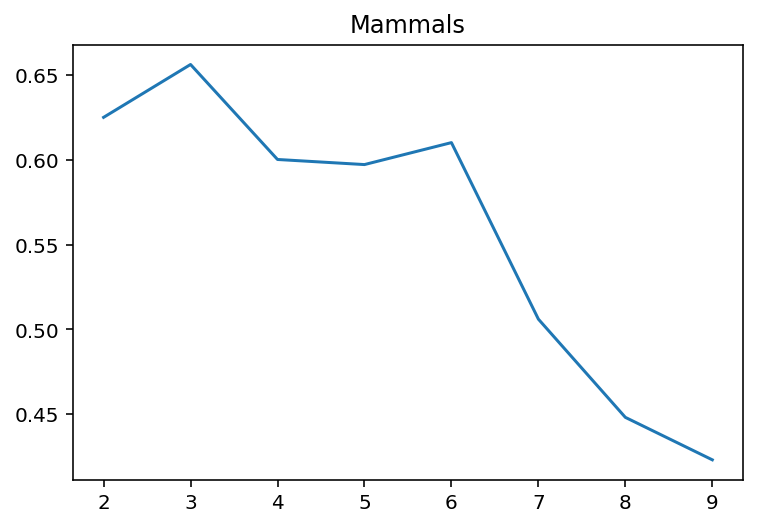

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(mammals_data, 'Mammals')

En esta ocasión se puede apreciar que el número óptimo de clústeres es 2, por lo que se puede proceder al ajuste con `KMeans`. Una vez ajustados el modelo se puede imprimir las propiedades de los diferentes clústeres.

In [5]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(mammals_data)
kmeans.cluster_centers_

array([[69.47142857,  9.51428571, 16.28571429,  2.92857143,  1.31142857],
       [86.0625    ,  4.275     ,  4.175     ,  5.11875   ,  0.635625  ],
       [45.65      , 10.15      , 38.45      ,  0.45      ,  0.69      ]])

Ahora se pueden obtener a que clúster pertenece cada animal e imprimir los grupos por pantalla

In [6]:
clust = kmeans.predict(mammals_data)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (mammals["name"][clust == i])

Cluster 0
16         Dog
17    Elephant
18      Rabbit
19         Rat
20        Deer
21    Reindeer
22       Whale
Name: name, dtype: object
Cluster 1
0          Horse
1      Orangutan
2         Monkey
3         Donkey
4          Hippo
5          Camel
6          Bison
7        Buffalo
8     Guinea Pig
9            Cat
10           Fox
11         Llama
12          Mule
13           Pig
14         Zebra
15         Sheep
Name: name, dtype: object
Cluster 2
23       Seal
24    Dolphin
Name: name, dtype: object
